In [1]:
import pickle
import json

data = []

with open('data/baike_qa_train.json', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        if line != '':
            # 报告分析点：json文件的读取原理和copy的意义
            sample = json.loads(line)
            data.append(sample.copy())


# 定义了数据的展示函数，给出数据量和前五条数据的信息
def display(data:list):
    print('len:', len(data))
    for i in range(5):
        print(data[i])

# 展示数据
display(data)

len: 1425170
{'qid': 'qid_5982723620932473219', 'category': '教育/科学-理工学科-地球科学', 'title': '人站在地球上为什么没有头朝下的感觉 ', 'desc': '', 'answer': '地球上重力作用一直是指向球心的，因此\r\n只要头远离球心，人们就回感到头朝上。'}
{'qid': 'qid_5679706523376347837', 'category': '娱乐-宠物', 'title': '我的小baby', 'desc': '我的小baby-辛巴。温顺可爱的，两个月大的小家伙，第一次养狗，该注意什么呢？求指教～[爱你]', 'answer': '勤洗澡，养成好的卫生习惯'}
{'qid': 'qid_6610724023825624555', 'category': '娱乐-度假旅游', 'title': '请问这起交通事故是谁的责任居多?小车和摩托车发生事故，在无红绿灯 ', 'desc': '小车和摩托车发生事故，在无红绿灯的十字路口，小停车看看左右，在觉得安全的情况下刹车慢慢以时速10公里左右的速度靠右行驶过路口，好没有出到十字路口正中时，被左边突然快速行驶过来的摩托车撞在车头前，摩托车主摔到膝盖和檫伤脸部，请问这起交通事故是谁的责任居多。如果双方都有责任的话，大概各占几成？~\r', 'answer': '通过没有信号控制的十字路口，应该减速慢性，让右边的车先行，按你说的，摩托车好像在汽车的左边，所以严格来说可能摩托车全责。当然还要看汽车是否证照齐全，是否饮酒等。具体由交警调查后认定。'}
{'qid': 'qid_8948366474478096617', 'category': '电脑/网络-互联网', 'title': '松本面板可以配什么品牌的超五类模块?? ', 'desc': '', 'answer': 'AMP的试试吧，还有普天的。'}
{'qid': 'qid_3057155567155332897', 'category': '生活-美食/烹饪', 'title': '请教怎么能很快能洗干净猪肠?有什么方法 ', 'desc': '有什么方法', 'answer': '先用清水冲一下,在用食盐反复的搓揉,直到肠的黏液全去掉为止,在用清水反复冲洗干净,

In [2]:
# 在前 1000 条数据内选取所有的 answer 作为训练数据
# 报告分析点：选取其他部分作为训练数据是否会对结果产生明显影响？（try title）
# 报告分析点：尝试数据的采样
# 报告分析点：尝试进行数据的词频分析，将出现频率过高的词（如介词冠词连词等虚词）定义为停用词，在训练过程中过滤掉。
train_data = [i['answer'] for i in data] + [i['title'] for i in data]

display(train_data)

len: 1000
地球上重力作用一直是指向球心的，因此
只要头远离球心，人们就回感到头朝上。
勤洗澡，养成好的卫生习惯
通过没有信号控制的十字路口，应该减速慢性，让右边的车先行，按你说的，摩托车好像在汽车的左边，所以严格来说可能摩托车全责。当然还要看汽车是否证照齐全，是否饮酒等。具体由交警调查后认定。
AMP的试试吧，还有普天的。
先用清水冲一下,在用食盐反复的搓揉,直到肠的黏液全去掉为止,在用清水反复冲洗干净,最好把肠上的油去掉一些再下锅。


In [3]:
import jieba
import re
from tqdm import tqdm

def clean_non_chinese(list):
        cleaned_lst = []
        for word in list:
            # 使用正则表达式去除非中文字符
            word = re.sub(r'[^\u4e00-\u9fff]', '', word)
            if word:
                cleaned_lst.append(word)
        return cleaned_lst


# 报告分析点：分词方式的差别 
# 可以尝试 lcut_for_search 或 cut_all=True
seg_data = []
for i in tqdm(train_data):
    seg_i = clean_non_chinese(jieba.lcut(i))
    seg_data.append(seg_i)

display(seg_data)


  0%|          | 0/1000 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.612 seconds.
Prefix dict has been built successfully.
100%|██████████| 1000/1000 [00:01<00:00, 727.30it/s]

len: 1000
['地球', '上', '重力', '作用', '一直', '是', '指向', '球心', '的', '因此', '只要', '头', '远离', '球心', '人们', '就', '回', '感到', '头朝', '上']
['勤', '洗澡', '养成', '好', '的', '卫生习惯']
['通过', '没有', '信号', '控制', '的', '十字路口', '应该', '减速', '慢性', '让', '右边', '的', '车', '先行', '按', '你', '说', '的', '摩托车', '好像', '在', '汽车', '的', '左边', '所以', '严格来说', '可能', '摩托车', '全责', '当然', '还要', '看', '汽车', '是否', '证照', '齐全', '是否', '饮酒', '等', '具体', '由', '交警', '调查', '后', '认定']
['的', '试试', '吧', '还有', '普天', '的']
['先', '用', '清水', '冲', '一下', '在', '用', '食盐', '反复', '的', '搓揉', '直到', '肠', '的', '黏液', '全', '去掉', '为止', '在', '用', '清水', '反复', '冲洗', '干净', '最好', '把', '肠', '上', '的', '油', '去掉', '一些', '再', '下锅']


('，', '的', ' ', '\r', '。', '是', '不', '一', '、', '有', '\n', '0', ',', '\u3000', '1', '以', '在', '可', '了', '2')


) missing from current font.ing\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


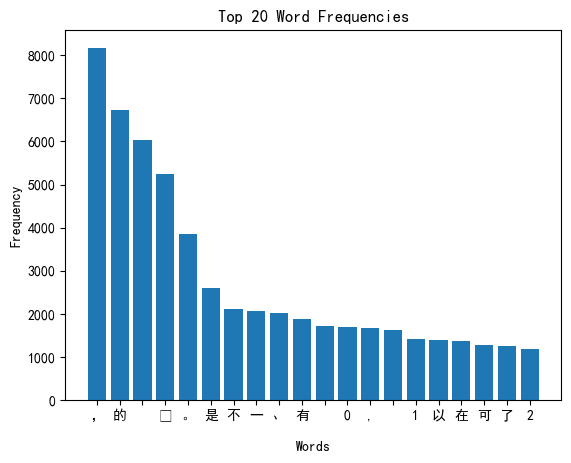

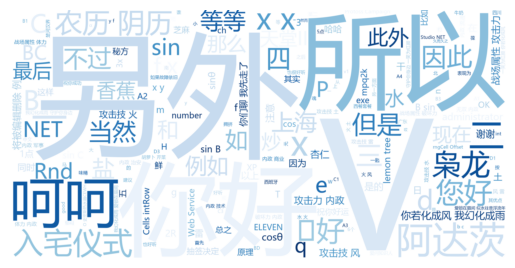

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']    # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来显示负号


def count_word_frequency(data):
    word_counts = Counter()
    for i in data:
        word_counts.update(i)
    return word_counts

def visualize_word_frequency(word_counts, num_words=20):
    words, counts = zip(*word_counts.most_common(num_words))
    print(words)
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {num_words} Word Frequencies')
    plt.show()

word_counts = count_word_frequency(train_data)
visualize_word_frequency(word_counts)


from wordcloud import WordCloud

wordcloud = WordCloud(width=2400, height=1200, font_path='msyh.ttc', background_color='white', colormap='Blues_r').generate(' '.join(train_data))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [7]:
from gensim.models import Word2Vec
from collections import Counter

# 创建Word2Vec模型
model = Word2Vec(sentences=seg_data, min_count=1, vector_size=100, window=5, workers=8)

# 将所有文本合并入一个列表，方便统计词频
nested_data = [i for sublist in tqdm(seg_data) for i in sublist]
frequency = Counter(nested_data)
# 记录最大词频
max_freq = frequency.most_common(1)[0][1]
print("词语\t词频\t采样概率")
for word, freq in tqdm(frequency.items()):
    # 对所有词语的采样概率进行重定义
    print(f"{word}:\t {freq},\t {(1 - ((freq - 1) / max_freq)) ** 20}")
    model.wv.set_vecattr(word, 'sample_probability', (1 - ((freq - 1) / max_freq)) ** 20)

# 训练模型
model.train(seg_data, total_examples=len(seg_data), epochs=5)
model.save('downsampling.model')

100%|██████████| 1000/1000 [00:00<00:00, 151091.64it/s]


词语	词频	采样概率


100%|██████████| 19672/19672 [00:00<00:00, 189546.06it/s]


地球:	 4,	 0.9908390595455422
上:	 325,	 0.36086596105230345
重力:	 1,	 1.0
作用:	 62,	 0.8286408816530948
一直:	 33,	 0.9062989545660832
是:	 1614,	 0.0034025700656500836
指向:	 5,	 0.9878031705064209
球心:	 2,	 0.9969374497537493
的:	 6521,	 5.172684568679965e-77
因此:	 43,	 0.8787707536771067
只要:	 50,	 0.8599756766518718
头:	 13,	 0.9638321898765299
远离:	 5,	 0.9878031705064209
人们:	 34,	 0.9035097009232543
就:	 631,	 0.13106793303196293
回:	 11,	 0.9697725852898148
感到:	 7,	 0.981757882344216
头朝:	 1,	 1.0
勤:	 1,	 1.0
洗澡:	 7,	 0.981757882344216
养成:	 17,	 0.9520549465120265
好:	 288,	 0.406491954906355
卫生习惯:	 1,	 1.0
通过:	 57,	 0.8415628974122735
没有:	 222,	 0.5017957571876629
信号:	 12,	 0.9667980531964984
控制:	 31,	 0.9119020215457883
十字路口:	 2,	 0.9969374497537493
应该:	 121,	 0.6897195557006092
减速:	 1,	 1.0
慢性:	 7,	 0.981757882344216
让:	 119,	 0.6940424470232449
右边:	 10,	 0.9727558101567532
车:	 22,	 0.9375255856129654
先行:	 1,	 1.0
按:	 41,	 0.8842120413654044
你:	 1013,	 0.03429031252383068
说:	 202,	 0.5346352153

" model.save('downsampling.model') "

In [ ]:
# 未经过降采样的默认配置下的模型
model = Word2Vec(sentences=seg_data, vector_size=100, window=5, min_count=1, workers=8)
model.save('normal.model')

# 相对于normal，将窗口尺寸由5调大为10，其他配置不变，训练出的模型
model = Word2Vec(sentences=seg_data, vector_size=100, window=10, min_count=1, workers=8)
model.save('bigger_window.model')

# 相对于normal，词向量尺寸由100降低为50，其他配置不变，训练出的模型
model = Word2Vec(sentences=seg_data, vector_size=50, window=5, min_count=1, workers=8)
model.save('shorter_vector.model')

# 相对于normal，将训练方法由CBOW改为Skip-gram，其他配置不变，训练出的模型
model = Word2Vec(sentences=seg_data, vector_size=100, window=5, min_count=1, workers=8, sg=1)
model.save('skip_gram.model')

# 相对于normal，将训练优化方法由负采样改为hierarchy softmax，其他配置不变，训练出的模型
model = Word2Vec(sentences=seg_data, vector_size=100, window=5, min_count=1, workers=8, hs=1)
model.save('hierachy_softmax.model')

# 相对于normal，将迭代次数由5改到10，其他配置不变，训练出的模型
model = Word2Vec(sentences=seg_data, vector_size=100, window=5, min_count=1, workers=8, epochs=10)
model.save('more_epochs.model')

In [ ]:
# 论文讨论点：还有哪些评估词向量训练结果的方法（这涉及如何对结果进行可视化分析）